<h1>Sentiment Analysis using VADER

<h3>
1. Import packages and dataset 

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joselineayala/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df = pd.read_csv('data_clean.csv')
df = df.drop(df.columns[0], axis=1) #drop unnamed column in index 0
df.head()

,tweet_id,user_id,description,location,following,followers,totaltweets,retweetcount,hashtags,text
0,1,100,"Perspicacity, Persistence, Prudence, Providenc...","New Delhi, India",541,44,20172,1,[],Entering a startup during a time of layoffs ca...
1,2,101,"Philadelphia area news, traffic, weather, poli...",Philadelphia,564,917037,355876,0,[],There are more people that have been moved int...
2,4,103,non-stop crew prop | @columbuscrew | @columbus...,NaN,974,747,16047,0,[],you guys play like a relegationthreatened cha...
3,5,104,NaN,NaN,533,186,18550,0,[],McKinsey amp Co doing what it does best Layof...
4,6,105,"husband, __ and __ father, brother, friend to ...",new york,367,43,1071,0,[],Bottom line is all the companies are becomi...


<h3> 2. Initiate Sentiment Analyzer

In [5]:
sentiments = SentimentIntensityAnalyzer()

In [6]:
text = df['text']
text = str(text).encode('utf-8')

In [7]:
#convert text column into string and apply polarity_scores funtion
df['score'] = df['text'].apply(lambda text:sentiments.polarity_scores(str(text)))
df

,tweet_id,user_id,description,location,following,followers,totaltweets,retweetcount,hashtags,text,score
0,1,100,"Perspicacity, Persistence, Prudence, Providenc...","New Delhi, India",541,44,20172,1,[],Entering a startup during a time of layoffs ca...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp..."
1,2,101,"Philadelphia area news, traffic, weather, poli...",Philadelphia,564,917037,355876,0,[],There are more people that have been moved int...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp..."
2,4,103,non-stop crew prop | @columbuscrew | @columbus...,NaN,974,747,16047,0,[],you guys play like a relegationthreatened cha...,"{'neg': 0.064, 'neu': 0.708, 'pos': 0.227, 'co..."
3,5,104,NaN,NaN,533,186,18550,0,[],McKinsey amp Co doing what it does best Layof...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp..."
4,6,105,"husband, __ and __ father, brother, friend to ...",new york,367,43,1071,0,[],Bottom line is all the companies are becomi...,"{'neg': 0.088, 'neu': 0.86, 'pos': 0.052, 'com..."
...,...,...,...,...,...,...,...,...,...,...,...
994,1992,1961,NaN,"Idaho, USA",465,139,712,0,[],Freedom politicians dying of old age bureaucr...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp..."
995,1994,1963,NaN,NaN,1295,171,4062,1,[],How do all of these businesses zombie companie...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."
996,1996,1965,"White Flight took life out of cities, Return W...","Phoenix, AZ",134,12,3916,0,[],Americans are mocked around the World why Beca...,"{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'comp..."
997,1998,1967,"Pirate, Critter, artist, her/she, veteran, hor...",Tennesee,1017,267,23097,1,[],I would imagine Tennessee has lost millions...,"{'neg': 0.058, 'neu': 0.803, 'pos': 0.139, 'co..."


<h3> 3. Create a compound column that takes all scores and decides whether a tweet is positive, negative or neutral

In [8]:
df['compound'] = df['score'].apply(lambda score_dict: score_dict['compound'])
df['sentiment']=''
df.loc[df.compound>0,'sentiment']='POSITIVE'
df.loc[df.compound==0,'sentiment']='NEUTRAL'
df.loc[df.compound<0,'sentiment']='NEGATIVE'

In [9]:
df.head()

,tweet_id,user_id,description,location,following,followers,totaltweets,retweetcount,hashtags,text,score,compound,sentiment
0,1,100,"Perspicacity, Persistence, Prudence, Providenc...","New Delhi, India",541,44,20172,1,[],Entering a startup during a time of layoffs ca...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.8047,POSITIVE
1,2,101,"Philadelphia area news, traffic, weather, poli...",Philadelphia,564,917037,355876,0,[],There are more people that have been moved int...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.4215,POSITIVE
2,4,103,non-stop crew prop | @columbuscrew | @columbus...,NaN,974,747,16047,0,[],you guys play like a relegationthreatened cha...,"{'neg': 0.064, 'neu': 0.708, 'pos': 0.227, 'co...",0.7650,POSITIVE
3,5,104,NaN,NaN,533,186,18550,0,[],McKinsey amp Co doing what it does best Layof...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6369,POSITIVE
4,6,105,"husband, __ and __ father, brother, friend to ...",new york,367,43,1071,0,[],Bottom line is all the companies are becomi...,"{'neg': 0.088, 'neu': 0.86, 'pos': 0.052, 'com...",-0.1986,NEGATIVE


<h3> 4. Visualize sentiment results

In [10]:
# Count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
NEGATIVE    382
NEUTRAL     217
POSITIVE    400
dtype: int64


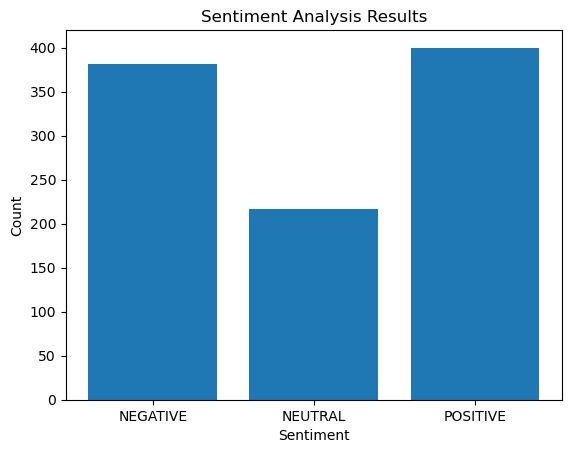

In [13]:
import matplotlib.pyplot as plt

# create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)

# set the title and labels
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# show the plot
plt.show()


<h3>Export to CSV

In [14]:
#Export to CSV
df.to_csv('sentiment_dataset.csv')